# Analytic Fourier Transform test:

Demonstrating the analytic Fourier transform matches the Mathematica solution. Here, I create a fidicual u, v plane and test the analytic fourier transforms against the mathematica solutions.

Since there are two sets of analytic solutions, relating to the hemispheric and complementary hemispheric harmonics respectively, I test each one.

In [1]:
import matplotlib.pyplot as plt

from harmonix.test_utils import jax_funcs, CHSH_FT
import numpy as np
import jax.numpy as jnp
from scipy.special import jn as besselj

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Fiducial u, v plane
lmax = 5
u, v = np.linspace(0.2,10,300),np.linspace(0.01,.01,300)
rho = np.sqrt(u**2 + v**2)
phi = np.arctan2(v,u)

## Complementary Hemispheric Harmonics:

Let's test the complementary hemispheric harmonic l=4, m=-3

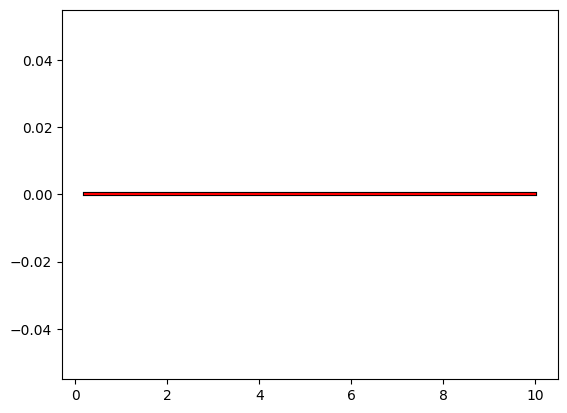

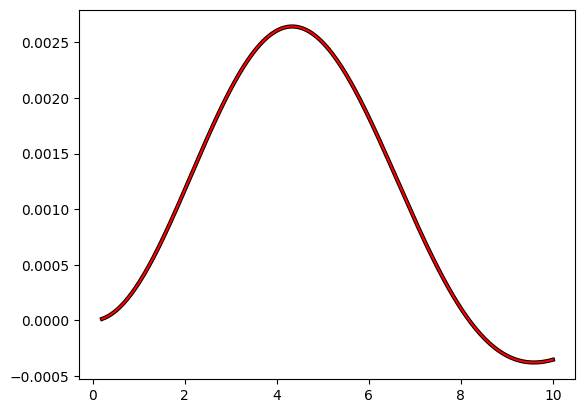

In [3]:
l=4
m=-3
plt.plot(rho, np.real(eval(jax_funcs[(l,m)])), c='k',lw=3)
plt.plot(rho,np.real(CHSH_FT(l,m)(rho,phi)), c='r')
plt.show()
plt.plot(rho, np.imag(eval(jax_funcs[(l,m)])), c='k',lw=3)
plt.plot(rho,np.imag(CHSH_FT(l,m)(rho,phi)), c='r')

## Hemispheric Harmonics
Let's test the complementary hemispheric harmonic l=4, m=-2

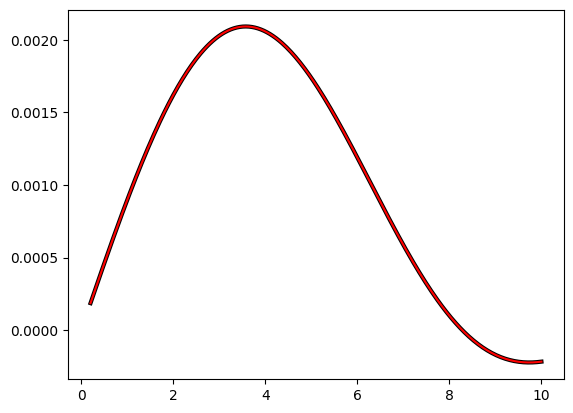

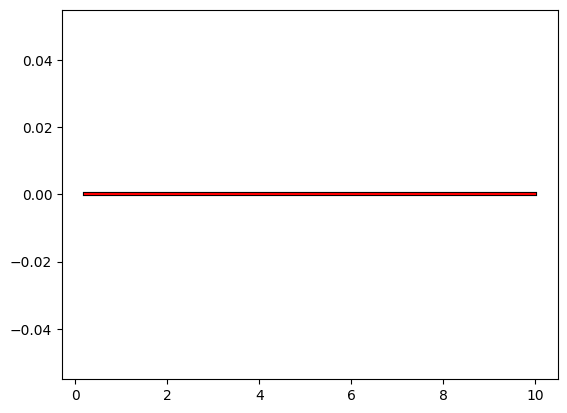

In [4]:
from harmonix.solution import j_to_nm, nm_to_j, transform_to_zernike, zernike_FT, jmax, A
y_hsh = np.zeros(jmax(5)+1)
l = 4
m = -2
y_hsh[nm_to_j(l,m)] = 1
zs = transform_to_zernike(y_hsh)
ft = np.zeros_like(rho, dtype='complex128')
for j in range(len(zs)):
    n_,m_ = j_to_nm(j)
    ft += zs[j]*zernike_FT(n_,m_)(rho,phi)
plt.plot(rho, np.real(eval(jax_funcs[(l,m)])), c='k',lw=3)
plt.plot(rho,np.real(ft), c='r')
plt.show()
plt.plot(rho, np.imag(eval(jax_funcs[(l,m)])), c='k',lw=3)
plt.plot(rho,np.imag(ft), c='r')